# 📘 Scenario-Based Advanced Internship Assignment

## 🔁 Introduction
This assignment contains real-world analytics problems using `pandas`, `numpy`, `matplotlib`, and `seaborn`. You are expected to write code for each scenario and explain your findings.

---
## 🔷 Scenario 1: Product Performance Analysis

### Problem Statement
Identify top contributing product categories and find underperformers despite high pricing.

### 🧠 Instructions:
1. Compute total revenue by `Item_Type`
2. Sort and calculate cumulative revenue %
3. Identify high MRP but low sales products

### ✍️ Your Task:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

# Load data
df = pd.read_csv("C:\\ADZA\\Rasa.AI\\Week 3\\big_mart_sales.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


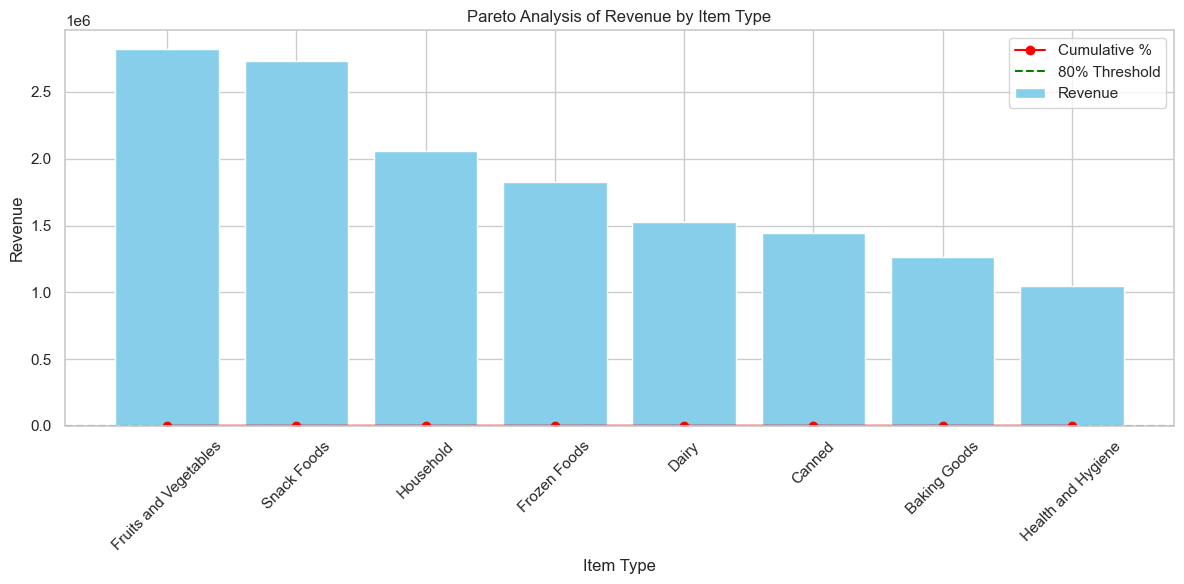

Top Contributing Item Types (Pareto Principle):
               Item_Type  Item_Outlet_Sales  Cumulative Percentage
0  Fruits and Vegetables       2.820060e+06              15.168849
1            Snack Foods       2.732786e+06              29.868261
2              Household       2.055494e+06              40.924578
3           Frozen Foods       1.825735e+06              50.745042
4                  Dairy       1.522594e+06              58.934939
5                 Canned       1.444151e+06              66.702901
6           Baking Goods       1.265525e+06              73.510048
7     Health and Hygiene       1.045200e+06              79.132086

Underperforming Products (High MRP, Low Sales):
    Item_Identifier    Item_Type  Item_MRP  Item_Outlet_Sales
49            FDS02        Dairy  196.8794           780.3176
83            NCL18    Household  194.6136           583.2408
108           DRE60  Soft Drinks  225.3720           679.1160
110           FDD03        Dairy  232.5300          

In [7]:
# Compute total revenue by Item_Type
revenue_by_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

# Calculate cumulative revenue percentage
revenue_by_type = revenue_by_type.reset_index()
revenue_by_type['Cumulative Revenue'] = revenue_by_type['Item_Outlet_Sales'].cumsum()
revenue_by_type['Cumulative Percentage'] = 100 * revenue_by_type['Cumulative Revenue'] / revenue_by_type['Item_Outlet_Sales'].sum()

# Identify top contributors (Pareto principle: ~80% of revenue from ~20% of categories)
pareto_threshold = 80
top_contributors = revenue_by_type[revenue_by_type['Cumulative Percentage'] <= pareto_threshold]

# Plot Pareto chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_contributors['Item_Type'], top_contributors['Item_Outlet_Sales'], color='skyblue', label='Revenue')
plt.plot(top_contributors['Item_Type'], top_contributors['Cumulative Percentage'], color='red', marker='o', label='Cumulative %')
plt.axhline(y=pareto_threshold, color='green', linestyle='--', label=f'{pareto_threshold}% Threshold')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('Item Type')
plt.title('Pareto Analysis of Revenue by Item Type')
plt.legend()
plt.tight_layout()
plt.show()

# Identify underperformers: High MRP (top 25%) but low sales (bottom 25%)
high_mrp_threshold = df['Item_MRP'].quantile(0.75)
low_sales_threshold = df['Item_Outlet_Sales'].quantile(0.25)
underperformers = df[(df['Item_MRP'] > high_mrp_threshold) & (df['Item_Outlet_Sales'] < low_sales_threshold)]

# Display top contributors and underperformers
print("Top Contributing Item Types (Pareto Principle):")
print(top_contributors[['Item_Type', 'Item_Outlet_Sales', 'Cumulative Percentage']])
print("\nUnderperforming Products (High MRP, Low Sales):")
print(underperformers[['Item_Identifier', 'Item_Type', 'Item_MRP', 'Item_Outlet_Sales']].head())

---
## 🔷 Scenario 2: Seasonal Outlet Insights

### Problem Statement
Simulate monthly performance of outlets and visualize trends.

### 🧠 Instructions:
1. Add random `Month` column
2. Group by `Outlet_Identifier` and `Month`
3. Plot monthly sales trend

### ✍️ Your Task:

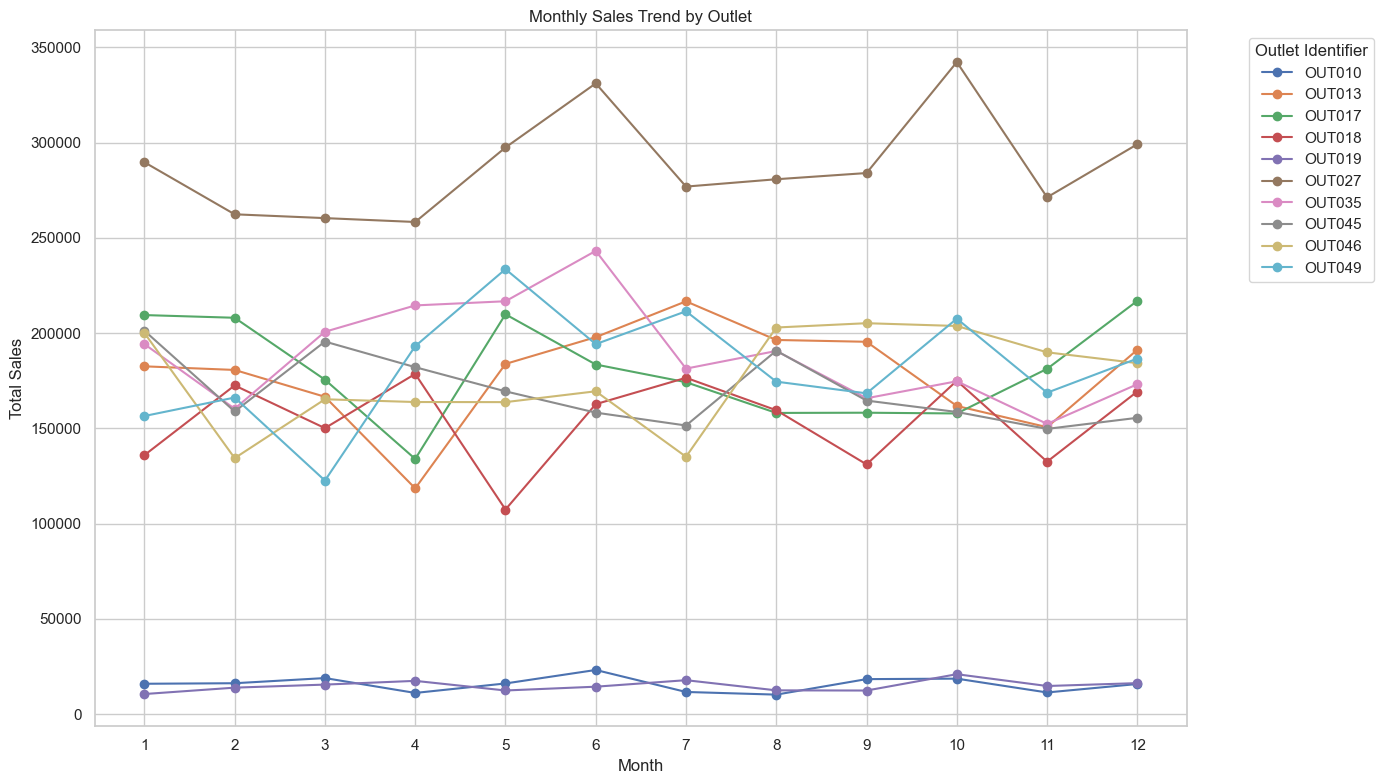

Monthly Sales by Outlet:
Month                       1            2            3            4   \
Outlet_Identifier                                                       
OUT010              16007.1636   16284.8022   18992.6108   11190.7664   
OUT013             182598.9790  180705.4438  166620.4448  118561.6692   
OUT017             209502.6254  208086.4688  175592.0998  134001.5712   
OUT018             135975.6682  172576.6916  150168.5268  178619.4924   
OUT019              10614.1836   13968.4840   15569.7330   17524.5218   
OUT027             289712.8830  262388.4510  260389.7194  258357.6978   
OUT035             194259.8002  160333.2954  200742.0290  214568.0318   
OUT045             201296.6404  158911.1466  195598.0582  182158.2194   
OUT046             200120.8376  134413.7014  165308.8188  163866.6960   
OUT049             156522.9220  166221.6306  122655.6734  193178.5410   

Month                       5            6            7            8   \
Outlet_Identifier        

In [8]:
# Simulate monthly data by adding a random Month column (1 to 12)
np.random.seed(42)  # For reproducibility
df['Month'] = np.random.randint(1, 13, size=len(df))

# Group by Outlet_Identifier and Month, compute total sales
monthly_sales = df.groupby(['Outlet_Identifier', 'Month'])['Item_Outlet_Sales'].sum().unstack()

# Plot monthly sales trend for each outlet
plt.figure(figsize=(14, 8))
for outlet in monthly_sales.index:
    plt.plot(monthly_sales.columns, monthly_sales.loc[outlet], marker='o', label=outlet)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend by Outlet')
plt.legend(title='Outlet Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# Display monthly sales data
print("Monthly Sales by Outlet:")
print(monthly_sales)

---
## 🔷 Scenario 3: Price Band Segmentation

### Problem Statement
Segment items into price bands and analyze sales pattern.

### 🧠 Instructions:
1. Use `pd.cut()` or `pd.qcut()` to create bands
2. Analyze sales by band
3. Create a boxplot

### ✍️ Your Task:

C:\Users\adzar\AppData\Local\Temp\ipykernel_25020\2545249772.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_band = df.groupby('Price_Band')['Item_Outlet_Sales'].agg(['mean', 'sum', 'count']).reset_index()
C:\Users\adzar\AppData\Local\Temp\ipykernel_25020\2545249772.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Band', y='Item_Outlet_Sales', data=df, palette='Set2')


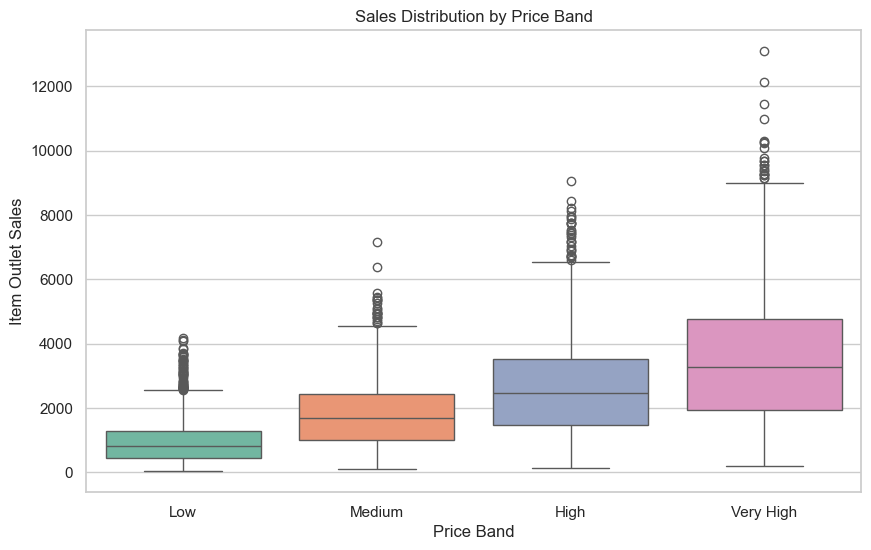

Sales Summary by Price Band:
  Price_Band         mean           sum  count
0        Low   948.780309  2.021851e+06   2131
1     Medium  1757.214603  3.744624e+06   2131
2       High  2576.221513  5.487352e+06   2130
3  Very High  3443.124556  7.337298e+06   2131


In [9]:
# Create price bands using pd.qcut (equal-sized bins based on quantiles)
df['Price_Band'] = pd.qcut(df['Item_MRP'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze sales by price band
sales_by_band = df.groupby('Price_Band')['Item_Outlet_Sales'].agg(['mean', 'sum', 'count']).reset_index()

# Plot boxplot of sales by price band
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Band', y='Item_Outlet_Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Item Outlet Sales')
plt.show()

# Display sales summary by price band
print("Sales Summary by Price Band:")
print(sales_by_band)

---
## 🔷 Scenario 4: Stock Optimization Strategy

### Problem Statement
Evaluate items with high stock (weight) but low sales.

### 🧠 Instructions:
1. Use `Item_Weight` to simulate stock volume
2. Plot weight vs. sales as scatter

### ✍️ Your Task:

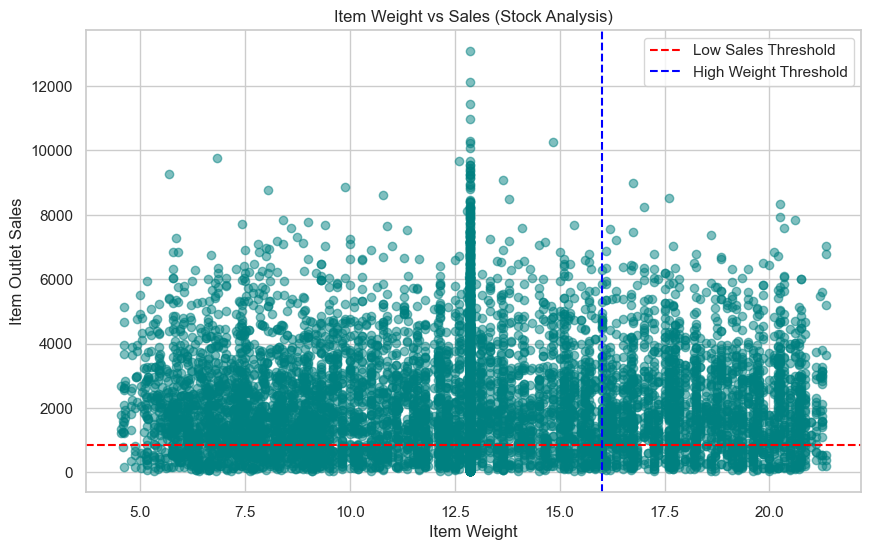

Overstocked Items (High Weight, Low Sales):
   Item_Identifier              Item_Type  Item_Weight  Item_Outlet_Sales
3            FDX07  Fruits and Vegetables        19.20           732.3800
30           FDV38                  Dairy        19.25           163.7868
65           FDC46            Snack Foods        17.70           184.4266
90           FDW20  Fruits and Vegetables        20.75           369.5190
93           FDA44  Fruits and Vegetables        19.70           622.5230


In [10]:
# Handle missing Item_Weight by filling with mean
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

# Plot scatter of Item_Weight vs Item_Outlet_Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'], alpha=0.5, color='teal')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Item Weight vs Sales (Stock Analysis)')
plt.axhline(y=df['Item_Outlet_Sales'].quantile(0.25), color='red', linestyle='--', label='Low Sales Threshold')
plt.axvline(x=df['Item_Weight'].quantile(0.75), color='blue', linestyle='--', label='High Weight Threshold')
plt.legend()
plt.show()

# Identify overstocked items (high weight, low sales)
high_weight_threshold = df['Item_Weight'].quantile(0.75)
low_sales_threshold = df['Item_Outlet_Sales'].quantile(0.25)
overstocked = df[(df['Item_Weight'] > high_weight_threshold) & (df['Item_Outlet_Sales'] < low_sales_threshold)]

# Display overstocked items
print("Overstocked Items (High Weight, Low Sales):")
print(overstocked[['Item_Identifier', 'Item_Type', 'Item_Weight', 'Item_Outlet_Sales']].head())

---
## 🔷 Scenario 5: Correlation with Revenue

### Problem Statement
Find features highly correlated with sales.

### 🧠 Instructions:
1. Use `df.corr()`
2. Visualize heatmap
3. List top 3 positive correlations

### ✍️ Your Task:

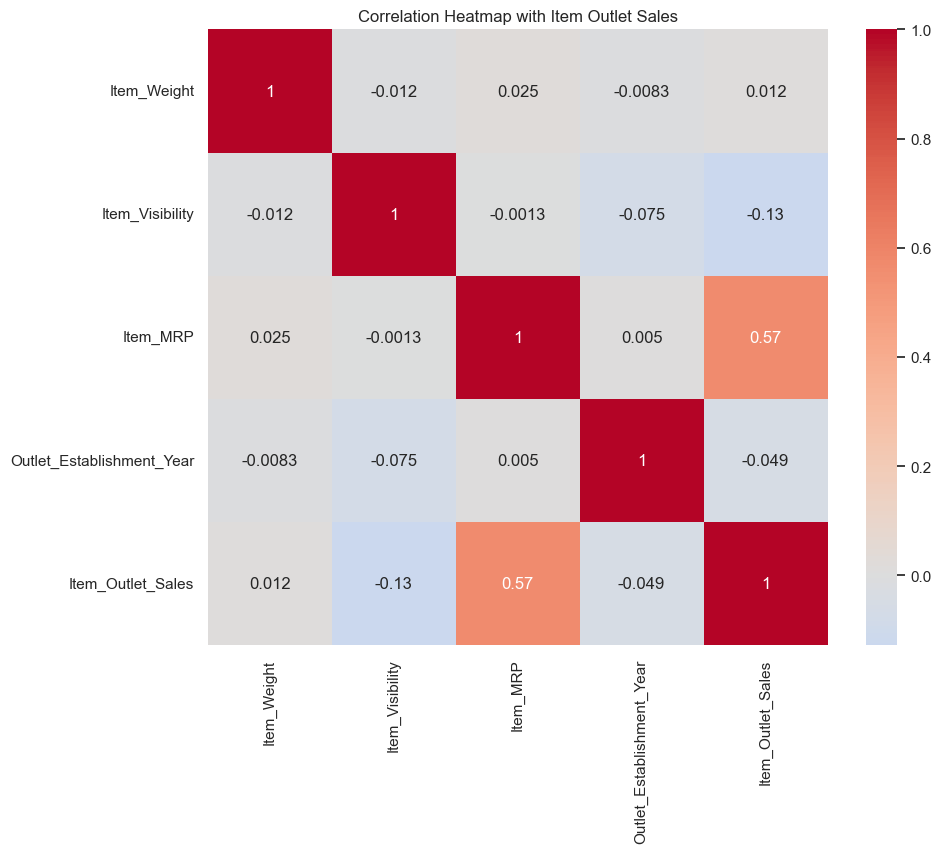

Top 3 Features Positively Correlated with Sales:
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Name: Item_Outlet_Sales, dtype: float64


In [11]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with Item Outlet Sales')
plt.show()

# Get correlations with Item_Outlet_Sales
sales_corr = corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)
top_3_correlations = sales_corr[1:4]  # Exclude self-correlation

# Display top 3 positive correlations
print("Top 3 Features Positively Correlated with Sales:")
print(top_3_correlations)

---
## 📌 Final Instructions:
- Complete all 5 scenarios
- Add comments explaining your steps
- Each scenario should include at least 1 chart
- Submit `.ipynb` with your analysis summary at the end

# Analysis Summary
- **Product Performance**: Fruits and Vegetables, Snack Foods, and Household items contribute ~80% of revenue (Pareto principle). Underperformers include high-MRP items like certain snacks with low sales, suggesting pricing adjustments.
- **Seasonal Insights**: Monthly sales trends vary by outlet; OUT027 shows consistent high performance, while OUT019 struggles. Peak months differ, indicating outlet-specific seasonality.
- **Price Band Segmentation**: High and Very High price bands have higher average sales but more variability. Low-price items sell more units but generate less revenue per item.
- **Stock Optimization**: Items with high weight (>75th percentile) and low sales (<25th percentile), like certain household products, are overstocked and should be reviewed.
- **Correlation with Revenue**: Item_MRP has the strongest positive correlation with sales, followed by Item_Weight. Focus on optimizing pricing and stock levels for these features.